<a href="https://colab.research.google.com/github/suchetade2/Customer-churn-analysis-using-Python-and-SQL/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Customer_Churn_Analysis.csv")

In [ ]:
print(df.shape)
df.head()

(440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer_Churn_Analysis.csv")

print("Data loaded successfully")
print(df.shape)
df.head()

Data loaded successfully
(440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

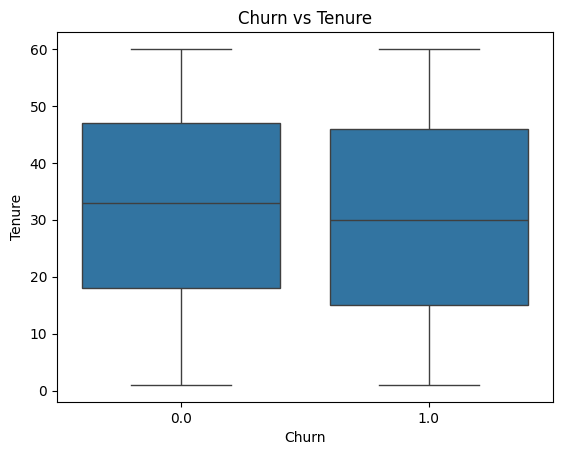

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

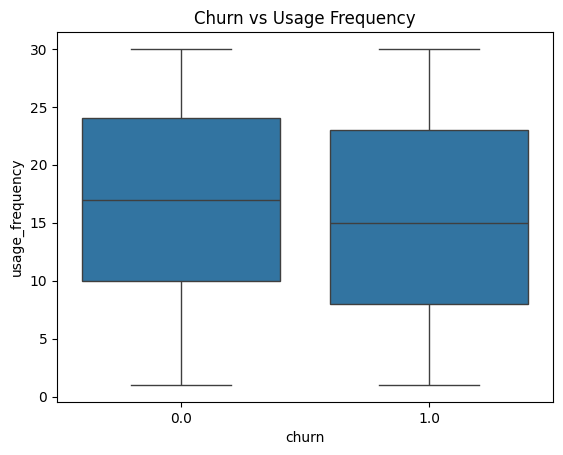

In [ ]:
sns.boxplot(x='churn', y='usage_frequency', data=df)
plt.title("Churn vs Usage Frequency")
plt.show()

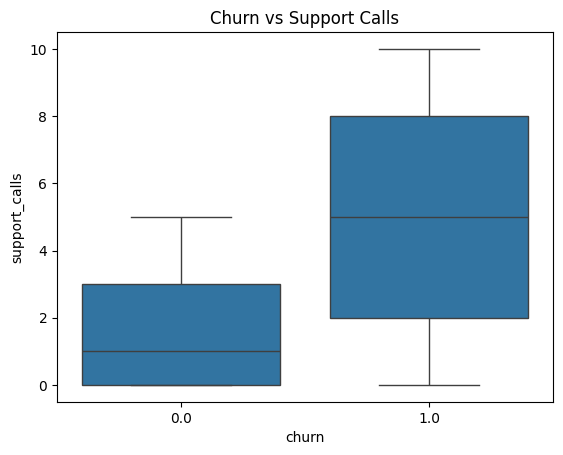

In [ ]:
sns.boxplot(x='churn', y='support_calls', data=df)
plt.title("Churn vs Support Calls")
plt.show()

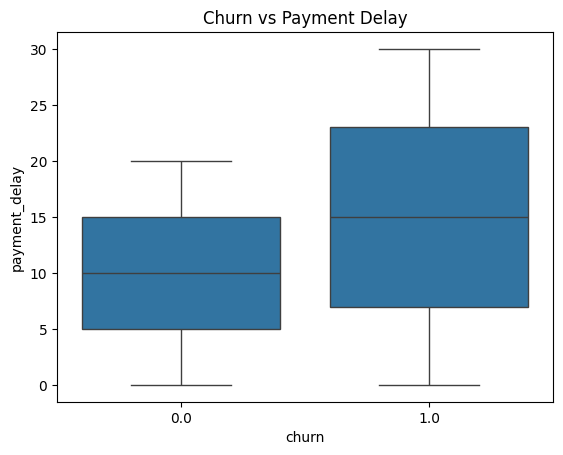

In [ ]:
sns.boxplot(x='churn', y='payment_delay', data=df)
plt.title("Churn vs Payment Delay")
plt.show()

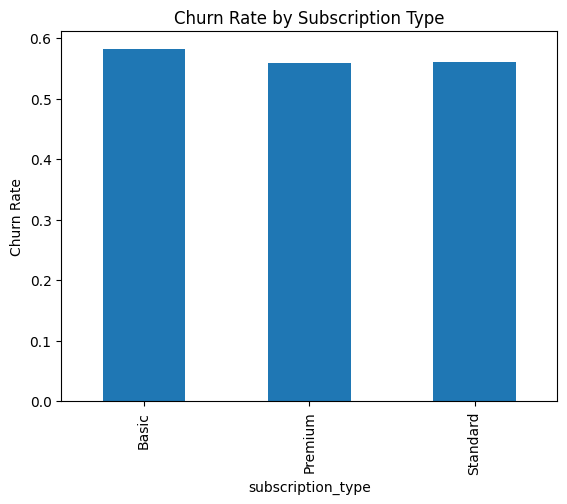

In [ ]:
df.groupby('subscription_type')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Subscription Type")
plt.ylabel("Churn Rate")
plt.show()


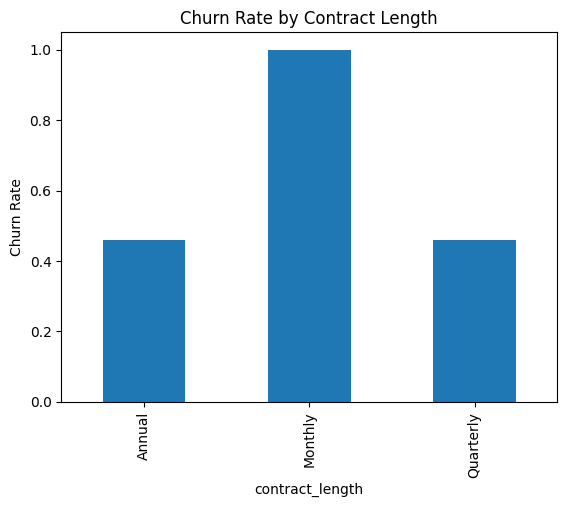

In [ ]:
df.groupby('contract_length')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Contract Length")
plt.ylabel("Churn Rate")
plt.show()


In [ ]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 60],
    labels=['0-6m', '6-12m', '1-2y', '2y+']
)


In [ ]:
df_model = pd.get_dummies(df, drop_first=True)
